# Finance Complaint Project

## Exploratory Data Analysis

### Problem Statement

The Consumer Financial Protection Bureau(CFPB) is a federal U.S. agency that acts as a mediator when disputes arise between financial institutions and consumers. Via a web form, consumers can send the agency a native of their dispute.

This project was made using Natural Language Processing(NLP) with machine learning models to process the issue's text written in the complaint and other features in the dataset to predict if the customer will dispute or not

**Industry use case**: An NLP + Machine Learning model would make the classification of whether the consumer will dispute with the company or not and thus helping the company to prioritize the complaint based on the prediction.

### Step 1: Importing Required Librries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_columns', 50)

- **Most of the companoes even though they solved the issue and responded to both customer and CFPB they choose not to provide public response. That can be a reason why consumer disputed response data is not publicaly available. This justifies the N/A values in target column.**

- **So while downloading the data N/A were removed**

### Step 2: Import the Parquet File as Pandas DataFrame

In [2]:
# df = pd.read_csv("../../complaints.csv")

In [3]:
# df.shape

In [4]:
#df1 = pd.read_json("data/complaints.json")

In [5]:
# import json
# import xml.etree.ElementTree as ET
# # import xml.dom.minidom
# import pandas as pd

# with open("data/complaints.json", "r") as json_file:
#     json_data = json.load(json_file)

# df1 = pd.DataFrame(json_data)

# # Define the path for the output Parquet file
# parquet_file_path = 'data/f_complaint.parquet'

# # Write the DataFrame to a Parquet file
# df1.to_parquet(parquet_file_path)

# print("Parquet file has been created and data has been stored.")

In [6]:
df_full = pd.read_parquet('data/f_complaint.parquet')

**Show 5 sample records**

In [7]:
df_full.sample(5)

,date_received,product,sub_product,issue,sub_issue,complaint_what_happened,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response,timely,consumer_disputed,complaint_id
425434,2023-08-01,Checking or savings account,Checking account,Opening an account,Didn't receive terms that were advertised,Checking account was opened on XX/XX/XXXX with...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MO,64151,,Consent provided,Web,2023-08-01,Closed with monetary relief,Yes,N/A,7328545
2957370,2022-11-22,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MD,20657,,Consent not provided,Web,2022-11-22,Closed with non-monetary relief,Yes,N/A,6235323
2128579,2023-11-23,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33178,,Consent not provided,Web,2023-11-23,Closed with non-monetary relief,Yes,N/A,7897559
1320496,2024-03-03,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,34746,,Consent not provided,Web,2024-03-03,Closed with explanation,Yes,N/A,8464497
3276049,2021-10-11,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19144,,Consent not provided,Web,2021-10-11,Closed with explanation,Yes,N/A,4801148


In [8]:
df_full.head()

,date_received,product,sub_product,issue,sub_issue,complaint_what_happened,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response,timely,consumer_disputed,complaint_id
0,2024-07-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,,,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AR,72212,,,Web,2024-07-10,In progress,Yes,N/A,9478840
1,2024-07-10,Credit reporting or other personal consumer re...,Other personal consumer report,Incorrect information on your report,Old information reappears or never goes away,,,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NJ,07047,,,Web,2024-07-10,In progress,Yes,N/A,9478827
2,2024-07-10,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account status incorrect,,,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,79404,,,Web,2024-07-10,In progress,Yes,N/A,9478826
3,2024-07-10,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,,,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77494,,,Web,2024-07-10,In progress,Yes,N/A,9478821
4,2024-07-10,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,,,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33060,,,Web,2024-07-10,In progress,Yes,N/A,9478809


**Shape of data**

In [9]:
df_full.shape

(5630440, 18)

**Unique Values in target column**

In [10]:
df_full.consumer_disputed.value_counts()

N/A    4862124
No      619938
Yes     148378
Name: consumer_disputed, dtype: int64

In [11]:
df_full.consumer_disputed.value_counts(normalize=True)*100

N/A    86.354246
No     11.010472
Yes     2.635283
Name: consumer_disputed, dtype: float64

**As we can see `complaint_what_happened` and `company_public_response` have several empty strings which can be converted to np.nan**

In [12]:
df_full.replace('', np.nan, inplace=True)

**Summary of dataset**

In [13]:
df_full.describe().T

,count,unique,top,freq
date_received,5630440,4606,2024-06-13,9245
product,5630440,21,"Credit reporting, credit repair services, or o...",2163873
sub_product,5395145,86,Credit reporting,3496435
issue,5630434,178,Incorrect information on your report,1690614
sub_issue,4889008,272,Information belongs to someone else,1118757
complaint_what_happened,1959509,1561531,In accordance with the Fair Credit Reporting a...,9568
company_public_response,2726159,11,Company has responded to the consumer and the ...,2470787
company,5630440,7295,"EQUIFAX, INC.",1203604
state,5583864,63,FL,686180
zip_code,5600214,33798,XXXXX,125624


In [14]:
619938+148378

768316

In [15]:
df = df_full[df_full.consumer_disputed != 'N/A']

In [16]:
df.consumer_disputed.value_counts(normalize=True)*100

No     80.687894
Yes    19.312106
Name: consumer_disputed, dtype: float64

In [17]:
df.describe().T

,count,unique,top,freq
date_received,768316,1970,2017-01-19,2070
product,768316,13,Mortgage,226885
sub_product,533157,50,Other mortgage,86631
issue,768316,99,"Loan modification,collection,foreclosure",112306
sub_issue,312951,61,Account status,37057
complaint_what_happened,164011,160917,I am filing this complaint because Experian ha...,103
company_public_response,195709,10,Company has responded to the consumer and the ...,95588
company,768316,4280,"BANK OF AMERICA, NATIONAL ASSOCIATION",65992
state,762666,62,CA,110612
zip_code,764459,28262,XXXXX,9692


**Check Datatypes in dataset**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768316 entries, 194 to 5630439
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   date_received              768316 non-null  object
 1   product                    768316 non-null  object
 2   sub_product                533157 non-null  object
 3   issue                      768316 non-null  object
 4   sub_issue                  312951 non-null  object
 5   complaint_what_happened    164011 non-null  object
 6   company_public_response    195709 non-null  object
 7   company                    768316 non-null  object
 8   state                      762666 non-null  object
 9   zip_code                   764459 non-null  object
 10  tags                       108479 non-null  object
 11  consumer_consent_provided  768278 non-null  object
 12  submitted_via              768316 non-null  object
 13  date_sent_to_company       768316 non-nul

df.isna().sum()

In [19]:
df_full.isna().sum()

date_received                      0
product                            0
sub_product                   235295
issue                              6
sub_issue                     741432
complaint_what_happened      3670931
company_public_response      2904281
company                            0
state                          46576
zip_code                       30226
tags                         5129515
consumer_consent_provided     295837
submitted_via                      0
date_sent_to_company               0
company_response                  17
timely                             0
consumer_disputed                  0
complaint_id                       0
dtype: int64

### Step 3: Exploring Data

In [20]:
# define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print list of columns
print(f"We have {len(numerical_features)} numerical features: {numerical_features}")
print(f"We have {len(categorical_features)} numerical features: {categorical_features}")

We have 0 numerical features: []
We have 18 numerical features: ['date_received', 'product', 'sub_product', 'issue', 'sub_issue', 'complaint_what_happened', 'company_public_response', 'company', 'state', 'zip_code', 'tags', 'consumer_consent_provided', 'submitted_via', 'date_sent_to_company', 'company_response', 'timely', 'consumer_disputed', 'complaint_id']


**Checking Null Values**

In [21]:
missing_data_full = df_full.isna().sum().div(df_full.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missing_data_full

,0
tags,91.103271
complaint_what_happened,65.197942
company_public_response,51.581777
sub_issue,13.168278
consumer_consent_provided,5.254243
sub_product,4.178981
state,0.827218
zip_code,0.536832
company_response,0.000302
issue,0.000107


In [22]:
missing_data = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
missing_data

,0
tags,85.880940
complaint_what_happened,78.653184
company_public_response,74.527538
sub_issue,59.267931
sub_product,30.607068
state,0.735375
zip_code,0.502007
consumer_consent_provided,0.004946
date_sent_to_company,0.000000
consumer_disputed,0.000000


**Dropping not improtant columns**

In [23]:
drop_columns = ['tags', 'complaint_what_happened', 'company_public_response', 'sub_issue', 'sub_product', 'zip_code', 'complaint_id']
df.drop(drop_columns, axis=1, inplace=True)

**Number of unique values in each column**

In [24]:
count = 1
for col in df.columns:
    print(f"{count}. {col}: {df[col].nunique()}")
    count += 1

1. date_received: 1970
2. product: 13
3. issue: 99
4. company: 4280
5. state: 62
6. consumer_consent_provided: 5
7. submitted_via: 6
8. date_sent_to_company: 2049
9. company_response: 7
10. timely: 2
11. consumer_disputed: 2


### Step 4: Visualization

#### 4.1 Visualize the Target Feature (Customer Disputed)

- **Whether the consumer disputed the company's response.**

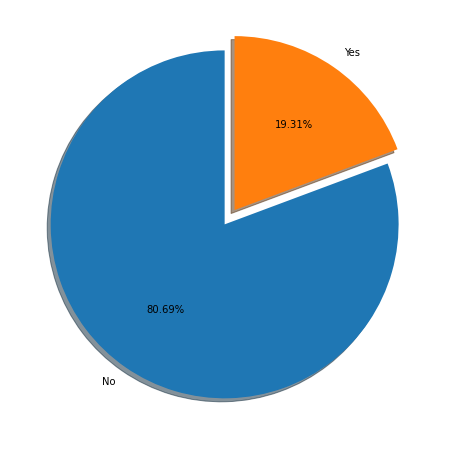

In [25]:
percentage = df.consumer_disputed.value_counts(normalize=True)*100
label = ["No", "Yes"]

#Plot Piechart with Plotly Library
fig, ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)
ax.pie(percentage, labels=label, startangle = 90,
      autopct="%1.2f%%", explode=explode, shadow=True)
plt.show()

   - From the Pie chart it is clear that the Target Variable is Imbalanced
  
**What is imbalanced data?**

- Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e., Here the number of Not-stroke has more count than the number of stroke of the dataset.

### Products on which the complaints were made.

- **The type of product the consumer identified in the complaint.**

In [26]:
produt_percentage = df['product'].value_counts(normalize=True)*100

In [27]:
# Percentage of each Top 10 product
produt_percentage.to_frame()[0:10]

,product
Mortgage,29.530167
Debt collection,18.965243
Credit reporting,18.277506
Credit card,11.608375
Bank account or service,11.219993
Student loan,4.233675
Consumer Loan,4.109507
Payday loan,0.721188
Money transfers,0.696849
Prepaid card,0.497061


**Visualizing product percentage in a pie chart**

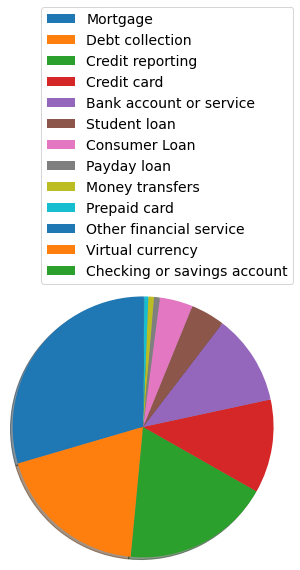

In [28]:
product_labels = produt_percentage.index

#Plot Piechart with Plotly Library
fig, ax = plt.subplots(figsize=(18, 5))
patches, texts = ax.pie(produt_percentage, startangle=90, shadow=True, radius= 1.2)
plt.legend(patches, product_labels, loc='best', bbox_to_anchor=(0.1,1.), fontsize=14)
plt.show()

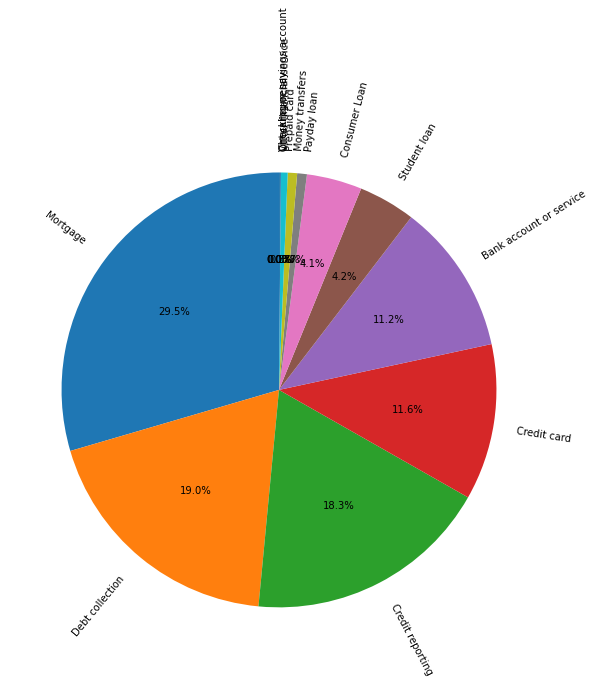

In [29]:
#Plot Piechart with Plotly Library
fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(produt_percentage, labels=product_labels, startangle = 90,
      autopct="%1.1f%%", shadow=False, rotatelabels=True)
plt.show()

In [30]:
top_states = df.state.value_counts(normalize=True)*100
top_states.to_frame()

,state
CA,14.503334
FL,9.648391
TX,7.788337
NY,6.887681
GA,4.751490
...,...
MP,0.004065
MH,0.003934
AS,0.003278
AA,0.001705


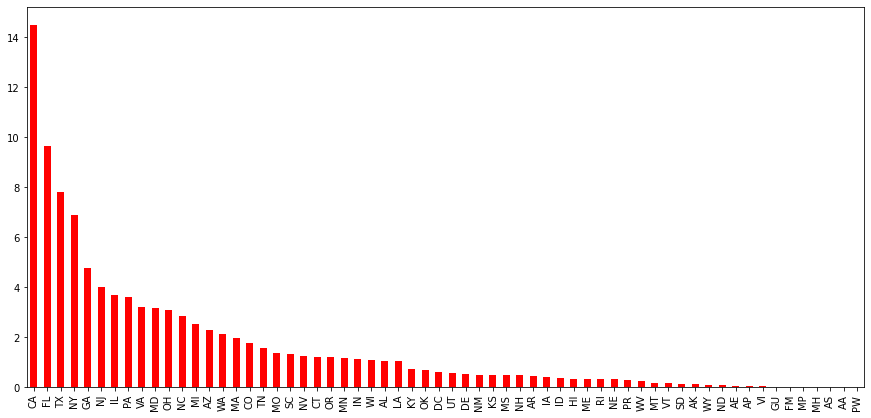

In [31]:
plt.subplots(figsize=(15,7))
top_states.plot(kind='bar', color='r')
plt.show()

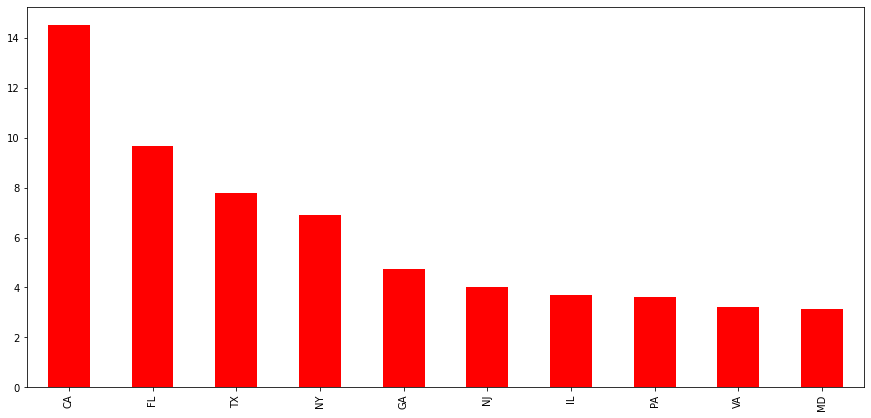

In [32]:
plt.subplots(figsize=(15,7))
top_states[:10].plot(kind='bar', color='r')
plt.show()

**Insights:**
- California(CA) has the heighest number of complaints registered which is 14.4% of the total complaints
- Then Followed by Florida with 9.6%

#### Company's Response and its effect on the Target Feature

- The company's mandatory response for the particular complaint

In [33]:
df.groupby("company_response")["consumer_disputed"].value_counts(normalize=True).to_frame()*100

consumer_disputed
company_response                consumer_disputed                   
Closed                          No                         79.416274
                                Yes                        20.583726
Closed with explanation         No                         78.771500
                                Yes                        21.228500
Closed with monetary relief     No                         89.415405
                                Yes                        10.584595
Closed with non-monetary relief No                         88.370777
                                Yes                        11.629223
Closed with relief              No                         86.651584
                                Yes                        13.348416
Closed without relief           No                         73.074771
                                Yes                        26.925229
Untimely response               No                         99.927061
                                Yes                         0.072939

**Proportion of consumer who has disputed and COmpany's response**

In [34]:
dispute_df = df.loc[df.consumer_disputed == 'Yes']
dispute_df.company_response.value_counts(normalize=True).to_frame()*100

,company_response
Closed with explanation,82.690830
Closed with non-monetary relief,7.479545
Closed with monetary relief,3.665638
Closed without relief,3.242394
Closed,2.443085
Closed with relief,0.477160
Untimely response,0.001348


**Visualization**

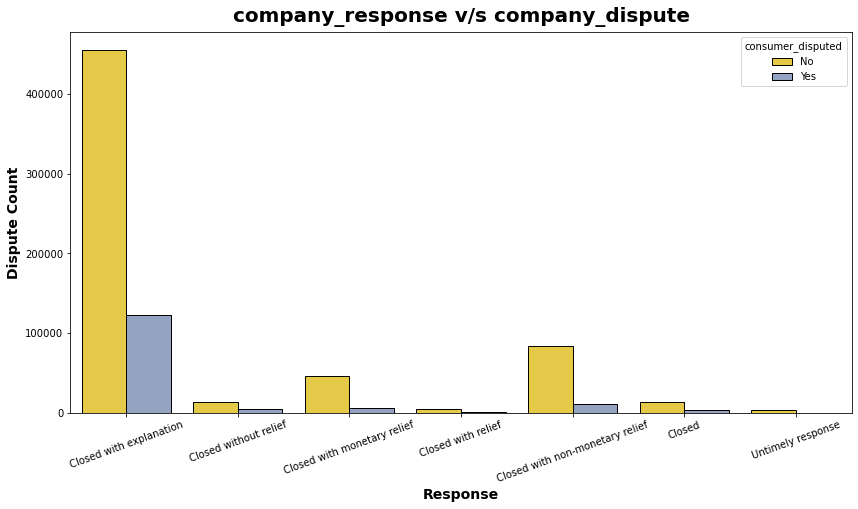

In [35]:
plt.subplots(figsize=(14,7))
sns.countplot(x='company_response', hue='consumer_disputed', data=df, ec='black', palette="Set2_r")
plt.title("company_response v/s company_dispute", weight="bold", fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Response", weight="bold", fontsize=14)
plt.xticks(rotation=20)
plt.show()

**Insights:**
- **The Year the CFPB recieved the complaint.**
- As this is the imbalanced data visualizing only the data in which consumer has dispute on the company's response

In [36]:
# create a copy of dispute consumer data
viz_df = dispute_df.copy()
viz_df['received_date'] = pd.to_datetime(viz_df['date_received']).dt.date
viz_df['received_month'] = pd.to_datetime(viz_df['date_received']).dt.month
viz_df['received_year'] = pd.to_datetime(viz_df['date_received']).dt.year

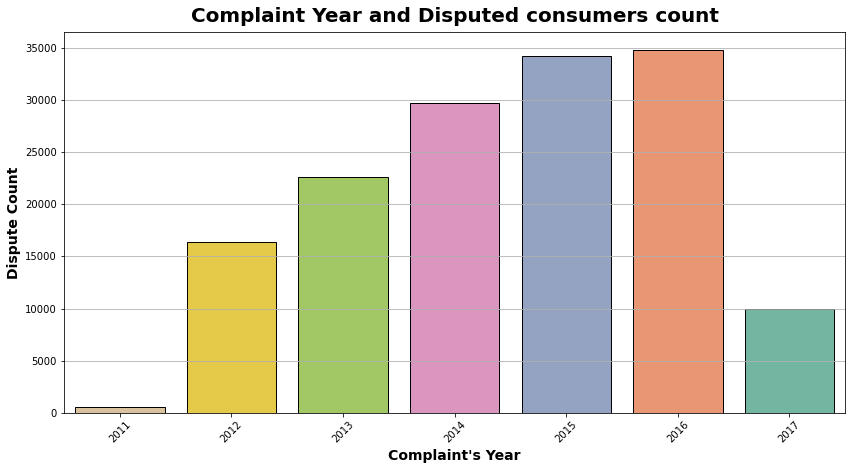

In [37]:
plt.subplots(figsize=(14,7))
sns.countplot(x='received_year', data=viz_df, ec='black', palette="Set2_r")
plt.title("Complaint Year and Disputed consumers count", weight="bold", fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's Year", weight="bold", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insights:**
- Complaints were highest on 2016 and 2015
- Complaints were Least on 2017 and 2011

### Finance Complaint Month and Disputed Consumer's Count

- **The month the CFPB recieved the complaint.**

**Map the Numerical months as month names**

In [38]:
viz_df.head()

,date_received,product,issue,company,state,consumer_consent_provided,submitted_via,date_sent_to_company,company_response,timely,consumer_disputed,received_date,received_month,received_year
913,2012-05-22,Mortgage,"Loan modification,collection,foreclosure",JPMORGAN CHASE & CO.,CA,N/A,Web,2012-05-30,Closed with explanation,Yes,Yes,2012-05-22,5,2012
13561,2012-11-01,Student loan,Problems when you are unable to pay,"Navient Solutions, LLC.",OH,N/A,Web,2012-11-01,Closed with explanation,Yes,Yes,2012-11-01,11,2012
24541,2013-05-31,Credit card,Late fee,TD BANK US HOLDING COMPANY,AZ,N/A,Web,2013-06-03,Closed with explanation,Yes,Yes,2013-05-31,5,2013
24767,2012-03-13,Credit card,Collection practices,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,N/A,Web,2012-03-14,Closed without relief,Yes,Yes,2012-03-13,3,2012
26739,2013-01-23,Mortgage,"Loan modification,collection,foreclosure","BANK OF AMERICA, NATIONAL ASSOCIATION",MD,N/A,Web,2013-08-22,Closed with explanation,Yes,Yes,2013-01-23,1,2013


In [39]:
map_months = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December"
    }

viz_df = viz_df.replace({'received_month': map_months})

**Plot the months against the dispute data count**

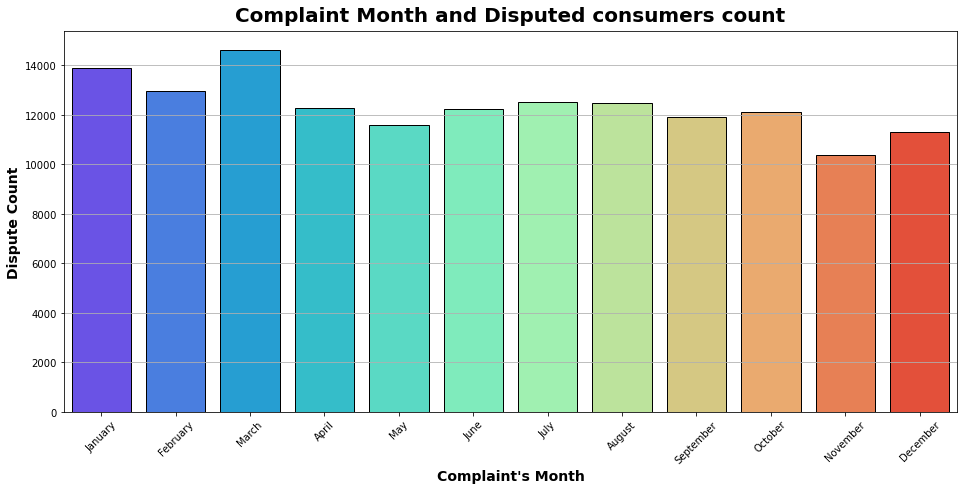

In [40]:
months_order = [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December"
]
plt.subplots(figsize=(16,7))
sns.countplot(x='received_month', data=viz_df, ec='black', palette="rainbow", order=months_order)
plt.title("Complaint Month and Disputed consumers count", weight="bold", fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Complaint's Month", weight="bold", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insights:**
- Month of March had recieved more complaints than another month
- Q1 of the year had more financial complaints

In [41]:
df.head()

,date_received,product,issue,company,state,consumer_consent_provided,submitted_via,date_sent_to_company,company_response,timely,consumer_disputed
194,2012-03-01,Mortgage,"Loan modification,collection,foreclosure",Onity Group Inc.,MN,N/A,Referral,2012-06-01,Closed with explanation,Yes,No
378,2012-03-02,Credit card,Credit line increase/decrease,JPMORGAN CHASE & CO.,IL,N/A,Referral,2012-10-25,Closed with explanation,Yes,No
825,2013-08-23,Mortgage,"Loan modification,collection,foreclosure",Onity Group Inc.,TX,N/A,Web,2013-08-23,Closed with explanation,Yes,No
913,2012-05-22,Mortgage,"Loan modification,collection,foreclosure",JPMORGAN CHASE & CO.,CA,N/A,Web,2012-05-30,Closed with explanation,Yes,Yes
1240,2012-04-25,Mortgage,"Application, originator, mortgage broker","BANK OF AMERICA, NATIONAL ASSOCIATION",MD,N/A,Referral,2012-04-25,Closed without relief,Yes,No


### Complaint Submissions
- How the complaint was submitted to the CFPB, for example, "Web" or "Phone"

In [42]:
df.submitted_via.value_counts(normalize=True).to_frame()*100

,submitted_via
Web,68.063922
Referral,17.341953
Phone,6.792257
Postal mail,6.334893
Fax,1.421681
Email,0.045294


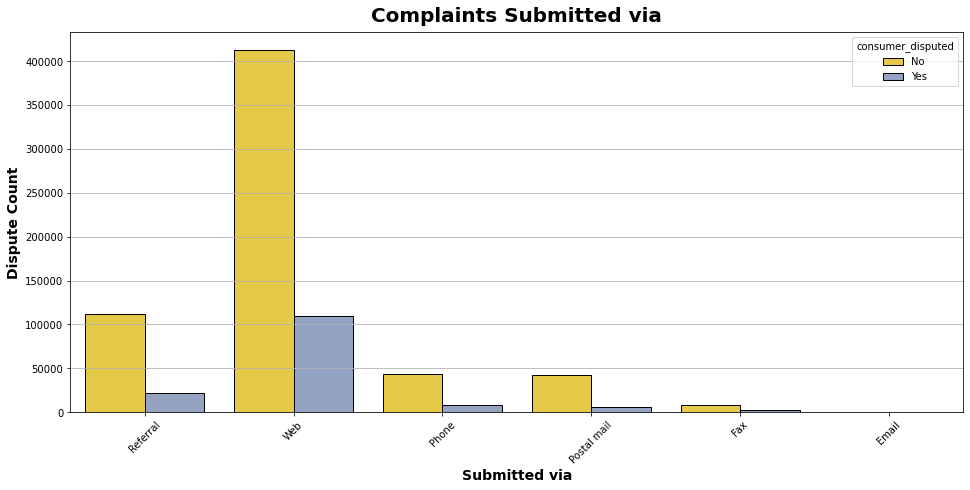

In [43]:
plt.subplots(figsize=(16,7))
sns.countplot(x='submitted_via',hue='consumer_disputed', data=df, ec='black', palette="Set2_r")
plt.title("Complaints Submitted via", weight="bold", fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Submitted via", weight="bold", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insights:**
- 68% of total complaints were submitted via Web.
- Second most used platform to submit is Referral then followed by Phone

### Timely response has any effect on Target column

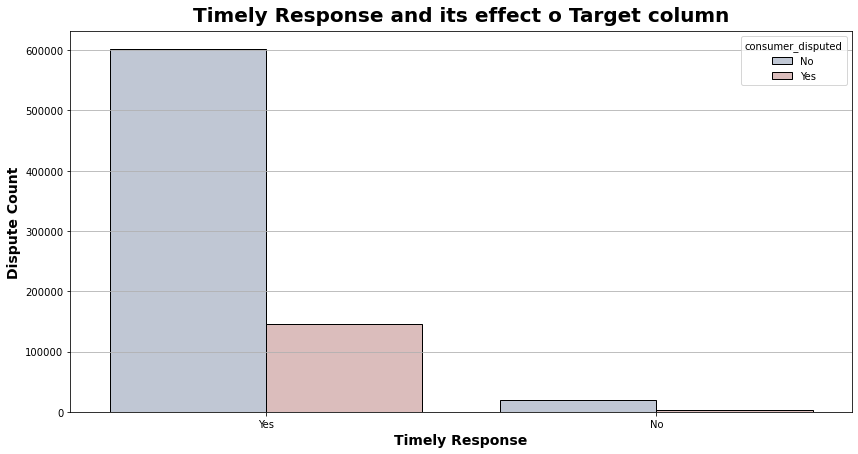

In [44]:
plt.subplots(figsize=(14,7))
sns.countplot(x='timely',hue='consumer_disputed', data=df, ec='black', palette="vlag")
plt.title("Timely Response and its effect o Target column", weight="bold", fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Timely Response", weight="bold", fontsize=14)
plt.grid(axis='y')
plt.show()

**Insights:**
- Most of the complaints which had timely response also had consumer disputed
- No much impact on target column

### Consumer consent provided and its effect on Target column
- Here consent provided columns is approval given by the consumer on publishing their complaints public

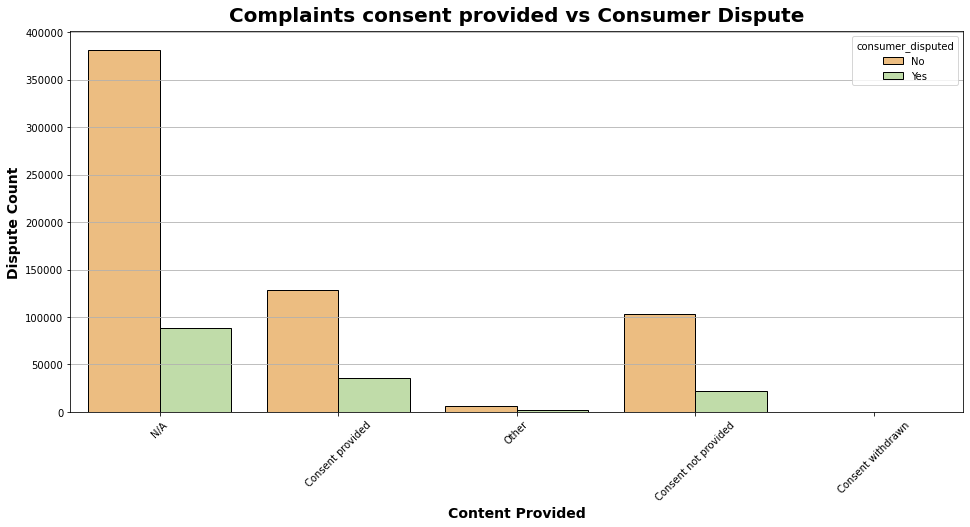

In [45]:
plt.subplots(figsize=(16,7))
sns.countplot(x='consumer_consent_provided',hue='consumer_disputed', data=df, ec='black', palette="Spectral")
plt.title("Complaints consent provided vs Consumer Dispute", weight="bold", fontsize=20, pad=10)
plt.ylabel("Dispute Count", weight="bold", fontsize=14)
plt.xlabel("Content Provided", weight="bold", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insights:**
- Most of the Record here is not available `N/A`.
- Consent Provided has more impact on the target variable, because most consumer wanted complaints to be public.

## Final Report

- **Dataset is collected from consumer finance US government website**
- **`tags`, `complaint_what_happened`, `company_public_response`, `sub_issue`, `sub_product`, `zip_code`, `complaint_id` are the columns which can be removed as they are redundant or does not help the model.**
- **`company` its a name column can be removed as it contains 4284 unique values, which cannot be used in model.**
- **new features can be created `days_to_forward_complaint` which is the difference between `date_sent_to_company`-`date_received`**
- **`issue` column is a text column, so text processing can be done and vectorized by tfidf for the model training.**
- **Null values can be imputed with mode.**